In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the data from Fraud_Data.csv
fraud_data = pd.read_csv('../CleanedData/merged_Dataset.csv')

In [3]:
# Load the data from creditcard.csv
credit_card_data = pd.read_csv('../CleanedData/CreditCleaned.csv')

Decision Tree


In [4]:
# Drop columns that are not important
fraud_data.drop(['user_id', 'signup_time', 'purchase_time', 'device_id', 'device_id_info', 'lower_bound_ip_address', 'upper_bound_ip_address', 'country'], axis=1, inplace=True)

# Encode categorical variables
fraud_data = pd.get_dummies(fraud_data, columns=['source', 'browser', 'sex'])

# Convert 'signup_purchase_duration' to numerical format
fraud_data['signup_purchase_duration'] = pd.to_timedelta(fraud_data['signup_purchase_duration']).dt.total_seconds()

# Separate features and target variable
X = fraud_data.drop('class', axis=1)
y = fraud_data['class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Decision Tree model training
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9046589018302829


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# EDA for class imbalance
class_counts = fraud_data['class'].value_counts()
fraud_percentage = class_counts[1] / (class_counts[0] + class_counts[1]) * 100
print("Percentage of fraud cases:", fraud_percentage)



Percentage of fraud cases: 9.367241941602828


DecisionTreeClassifier()

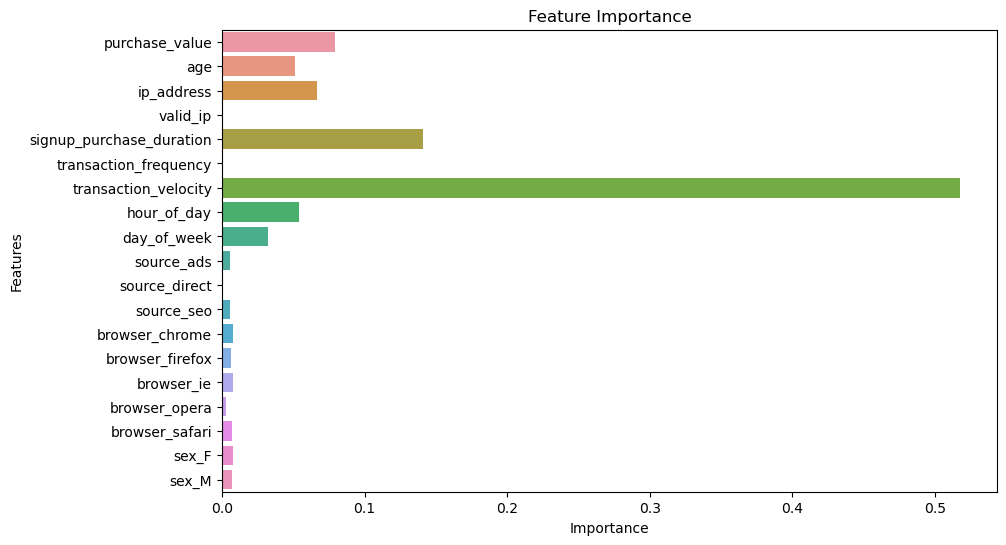

In [10]:
# Feature importance plot
X = fraud_data.drop('class', axis=1)
y = fraud_data['class']

model = DecisionTreeClassifier()
model.fit(X, y)
feature_importance = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9567054908485857


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting model training
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9566722129783694


In [ ]:
from sklearn.neural_network import MLPClassifier
